In [1]:
import sys
import random
import timeit
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def generate_graph_with_density(num_node, density, weight_range = (1, 10)):
    # Create an empty graph
    actual_edges = 0
    G = nx.Graph()
    # Add nodes
    G.add_nodes_from(range(num_node))
    # calculate the num_edge due to density
    max_edges = (num_node * (num_node - 1)) / 2
    if density == 0:
        actual_edges = num_node - 1
    elif density > 1:
        print('Error')
    else:
        actual_edges = int(density * max_edges)
    # Add edges randomly with weights
    while actual_edges > 0:
        node1 = np.random.randint(0, num_node - 1)
        node2 = np.random.randint(0, num_node - 1)
        weight = random.randint(weight_range[0], weight_range[1])
        if node1 != node2 and not G.has_edge(node1, node2):
            G.add_edge(node1, node2, weight=weight)
            actual_edges -= 1
    return G

In [3]:
def prim(adj_matrix):
    vertices = len(adj_matrix)
    # Initialize lists to store MST and key values
    mst = [None] * vertices
    key = [sys.maxsize] * vertices
    mst_set = [False] * vertices

    # Start from the first vertex
    key[0] = 0
    mst[0] = -1

    for _ in range(vertices):
        # Choose the minimum key vertex not yet in MST
        u = min_key(vertices, key, mst_set)
        mst_set[u] = True

        # Update key values and MST for adjacent vertices
        for v in range(vertices):
            if adj_matrix[u][v] and not mst_set[v] and adj_matrix[u][v] < key[v]:
                mst[v] = u
                key[v] = adj_matrix[u][v]

    return mst

In [4]:
def prim_mst(graph):
    # Initialize an empty MST
    mst = nx.Graph()

    # Choose an arbitrary starting vertex
    start_vertex = list(graph.nodes())[0]

    # Initialize sets for visited and unvisited vertices
    visited = {start_vertex}
    unvisited = set(graph.nodes()) - visited

    # Repeat until all vertices are visited
    while unvisited:
        min_edge = None
        min_weight = float('inf')

        # Find the minimum weight edge connecting a visited vertex to an unvisited vertex
        for u in visited:
            for v in unvisited:
                if graph.has_edge(u, v):
                    weight = graph[u][v]['weight']
                    if weight < min_weight:
                        min_weight = weight
                        min_edge = (u, v)

        # Add the minimum weight edge to the MST
        if min_edge:
            u, v = min_edge
            mst.add_edge(u, v, weight=min_weight)
            # Update visited and unvisited sets
            visited.add(v)
            unvisited.remove(v)

    return mst

In [5]:
def generate_dense_graph(num_vertices, max_weight=10):
    graph = [[0] * num_vertices for _ in range(num_vertices)]
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            weight = random.randint(1, max_weight)
            graph[i][j] = weight
            graph[j][i] = weight
    return graph

def min_key(vertices, key, mst_set):
    min_value = sys.maxsize
    min_index = None

    for v in range(vertices):
        if key[v] < min_value and not mst_set[v]:
            min_value = key[v]
            min_index = v
    if min_index is not None:
        return min_index
    else:
        return -1  # Or any other suitable sentinel value




In [6]:
def generate_weighted_dense_graph(n_nodes):
    dense_graph = nx.Graph()

    # Add nodes to the graph
    dense_graph.add_nodes_from(range(n_nodes))

    # Add edges to the graph with random weights
    for i in range(n_nodes):
        for j in range(i+1, n_nodes):
            dense_graph.add_edge(i, j, weight=random.randint(1, 10))

    return dense_graph



In [7]:
def sparse_adjacency_matrix(num_nodes, num_edges, weight_range=(1, 10)):
    # Create an empty adjacency matrix
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    # Generate random edges with weights
    edges = set()
    while len(edges) < num_edges:
        node1 = np.random.randint(0, num_nodes)
        node2 = np.random.randint(0, num_nodes)
        weight = np.random.randint(weight_range[0], weight_range[1] + 1)
        if node1 != node2 and (node1, node2) not in edges and (node2, node1) not in edges:
            edges.add((node1, node2))
            adjacency_matrix[node1][node2] = weight
            adjacency_matrix[node2][node1] = weight  # Assuming an undirected graph

    return adjacency_matrix

In [8]:
def generate_weighted_sparse_graph(num_nodes, num_edges, weight_range=(1, 10)):
    # Create an empty graph
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(num_nodes))

    # Add edges randomly with weights
    edge_count = 0
    while edge_count < num_edges:
        node1 = random.randint(0, num_nodes - 1)
        node2 = random.randint(0, num_nodes - 1)
        weight = random.randint(weight_range[0], weight_range[1])
        if node1 != node2 and not G.has_edge(node1, node2):
            G.add_edge(node1, node2, weight=weight)
            edge_count += 1

    return G

In [9]:
# Example implement on dense graph as adjancency matrix
start = timeit.default_timer()
if __name__ == "__main__":
    num_vertices = 15
    dense_graph = generate_dense_graph(num_vertices)

    print("Dense Graph (Adjacency Matrix):")
    for row in dense_graph:
        print(row)

    # Compute MST using Prim's algorithm
    mst = prim(dense_graph)
    print("\nMinimum Spanning Tree (MST):")
    print("Edge \t Weight")
    min_sum = 0
    for i in range(1, len(mst)):
        print(f"{mst[i]} - {i} \t {dense_graph[i][mst[i]]}")
        min_sum += dense_graph[i][mst[i]]
    print('Sum: ', min_sum)
stop = timeit.default_timer()
print('Time: ', stop - start)

Dense Graph (Adjacency Matrix):
[0, 4, 8, 7, 8, 2, 9, 8, 2, 6, 7, 7, 1, 8, 3]
[4, 0, 1, 1, 4, 3, 5, 4, 6, 5, 7, 3, 3, 4, 3]
[8, 1, 0, 7, 10, 4, 3, 8, 4, 5, 1, 2, 4, 10, 1]
[7, 1, 7, 0, 9, 6, 10, 6, 9, 3, 8, 7, 3, 9, 2]
[8, 4, 10, 9, 0, 1, 7, 3, 8, 1, 4, 8, 1, 3, 6]
[2, 3, 4, 6, 1, 0, 4, 5, 8, 1, 10, 1, 7, 7, 6]
[9, 5, 3, 10, 7, 4, 0, 9, 3, 4, 2, 2, 10, 8, 9]
[8, 4, 8, 6, 3, 5, 9, 0, 2, 3, 4, 2, 3, 5, 5]
[2, 6, 4, 9, 8, 8, 3, 2, 0, 4, 4, 10, 6, 9, 4]
[6, 5, 5, 3, 1, 1, 4, 3, 4, 0, 4, 10, 1, 4, 8]
[7, 7, 1, 8, 4, 10, 2, 4, 4, 4, 0, 10, 7, 7, 10]
[7, 3, 2, 7, 8, 1, 2, 2, 10, 10, 10, 0, 10, 1, 4]
[1, 3, 4, 3, 1, 7, 10, 3, 6, 1, 7, 10, 0, 8, 3]
[8, 4, 10, 9, 3, 7, 8, 5, 9, 4, 7, 1, 8, 0, 7]
[3, 3, 1, 2, 6, 6, 9, 5, 4, 8, 10, 4, 3, 7, 0]

Minimum Spanning Tree (MST):
Edge 	 Weight
2 - 1 	 1
11 - 2 	 2
1 - 3 	 1
12 - 4 	 1
4 - 5 	 1
11 - 6 	 2
11 - 7 	 2
0 - 8 	 2
12 - 9 	 1
2 - 10 	 1
5 - 11 	 1
0 - 12 	 1
11 - 13 	 1
2 - 14 	 1
Sum:  18
Time:  0.009988336999995795


Vertices: [0, 1, 2, 3, 4]
Edge: 0 - 1, Weight: 3
Edge: 0 - 2, Weight: 8
Edge: 0 - 3, Weight: 2
Edge: 0 - 4, Weight: 5
Edge: 1 - 2, Weight: 2
Edge: 1 - 3, Weight: 8
Edge: 1 - 4, Weight: 7
Edge: 2 - 3, Weight: 1
Edge: 2 - 4, Weight: 9
Edge: 3 - 4, Weight: 2

Minimum Spanning Tree Edges:
Edge: 0 - 3, Weight: 2
Edge: 3 - 2, Weight: 1
Edge: 3 - 4, Weight: 2
Edge: 2 - 1, Weight: 2


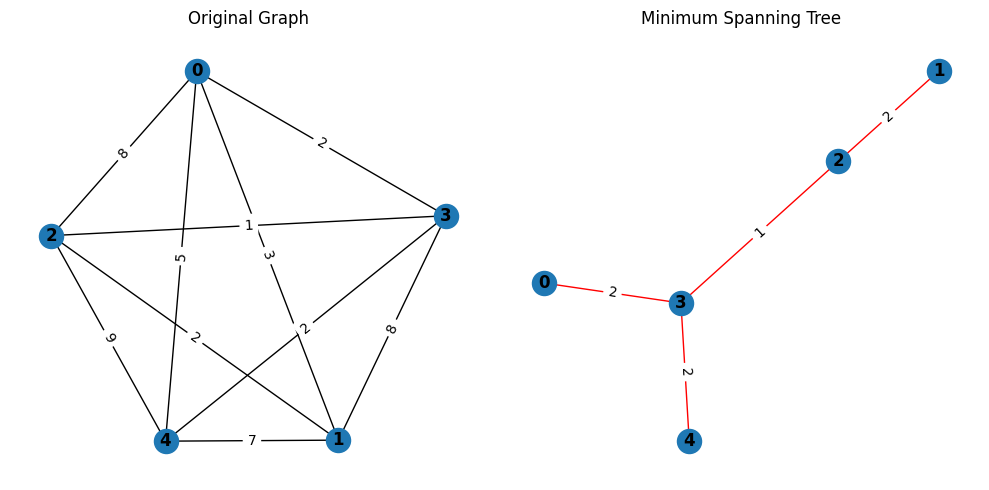

In [10]:
# Implementation on dense graph as graph
num_nodes = 5
dense_graph1 = generate_weighted_dense_graph(num_nodes)

# Print the vertices of the graph
print("Vertices:", dense_graph1.nodes())

# Print the edges and their weights
for u, v, w in dense_graph1.edges(data='weight'):
    print(f"Edge: {u} - {v}, Weight: {w}")

# Find the minimum spanning tree using Prim's algorithm
mst = prim_mst(dense_graph1)
print("\nMinimum Spanning Tree Edges:")
for u, v, w in mst.edges(data='weight'):
    print(f"Edge: {u} - {v}, Weight: {w}")

# Visualize the original graph and MST (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(121)
pos = nx.spring_layout(dense_graph1)
nx.draw(dense_graph1, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(dense_graph1, 'weight')
nx.draw_networkx_edge_labels(dense_graph1, pos, edge_labels=labels)
plt.title("Original Graph")

plt.subplot(122)
pos_mst = nx.spring_layout(mst)
nx.draw(mst, pos_mst, with_labels=True, font_weight='bold', edge_color='r')
labels_mst = nx.get_edge_attributes(mst, 'weight')
nx.draw_networkx_edge_labels(mst, pos_mst, edge_labels=labels_mst)
plt.title("Minimum Spanning Tree")

plt.tight_layout()
plt.show()

Weighted sparse adjacency matrix:
[[ 0.  5.  0.  4.  0. 10.  0.  0.  0.  0.]
 [ 5.  0.  0.  0. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  0.  0.  3.  0.  0.  0.  0.]
 [ 0. 10.  5.  0.  0.  0.  6.  0.  9.  1.]
 [10.  0.  0.  3.  0.  0.  0. 10.  0.  0.]
 [ 0.  0.  0.  0.  6.  0.  0.  9.  6.  0.]
 [ 0.  0.  0.  0.  0. 10.  9.  0.  8.  2.]
 [ 0.  0.  0.  0.  9.  0.  6.  8.  0.  3.]
 [ 0.  0.  0.  0.  1.  0.  0.  2.  3.  0.]]

Minimum Spanning Tree (MST):
Edge 	 Weight
0 - 1 	 5.0
4 - 2 	 5.0
0 - 3 	 4.0
1 - 4 	 10.0
3 - 5 	 3.0
4 - 6 	 6.0
9 - 7 	 2.0
9 - 8 	 3.0
4 - 9 	 1.0
Sum:  39.0


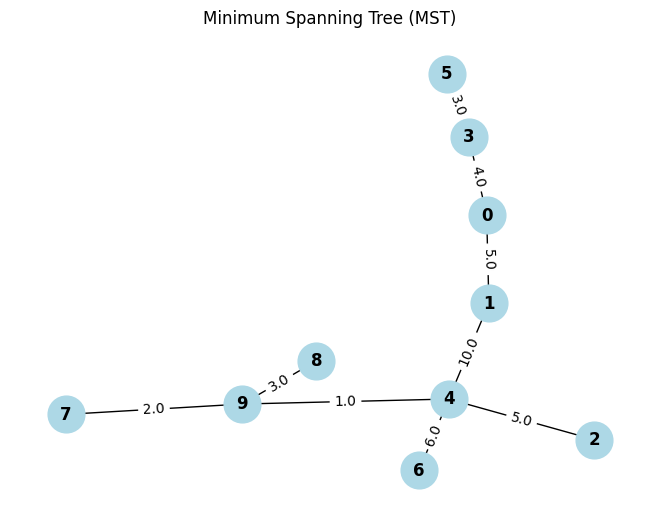

In [11]:
# Implementation on sparse graph as adjancency matrix
num_nodes = 10  # Number of nodes
num_edges = 15  # Number of edges
weight_range = (1, 10)  # Range of weights for edges

# Generate weighted sparse adjacency matrix
sparse_matrix = sparse_adjacency_matrix(num_nodes, num_edges, weight_range)

# Print weighted adjacency matrix
print("Weighted sparse adjacency matrix:")
print(sparse_matrix)
mst_sparse = prim(sparse_matrix)
print("\nMinimum Spanning Tree (MST):")
print("Edge \t Weight")
min_sum = 0
for i in range(1, len(mst_sparse)):
        print(f"{mst_sparse[i]} - {i} \t {sparse_matrix[i][mst_sparse[i]]}")
        min_sum += sparse_matrix[i][mst_sparse[i]]
print('Sum: ', min_sum)
# Visualize the original graph and MST (optional)
G = nx.Graph()

for i in range(1, len(mst_sparse)):
    G.add_edge(i, mst_sparse[i])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, mst_sparse[i]): sparse_matrix[i][mst_sparse[i]] for i in range(1, len(mst_sparse))})
plt.title("Minimum Spanning Tree (MST)")
plt.show()

Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges: [(0, 9), (0, 5), (0, 8), (1, 7), (1, 4), (1, 3), (1, 2), (2, 6), (2, 8), (3, 9), (3, 7), (4, 7), (5, 8), (5, 6), (5, 9)]
Edge weights:
(0, 9, {'weight': 8})
(0, 5, {'weight': 10})
(0, 8, {'weight': 7})
(1, 7, {'weight': 4})
(1, 4, {'weight': 4})
(1, 3, {'weight': 8})
(1, 2, {'weight': 9})
(2, 6, {'weight': 3})
(2, 8, {'weight': 6})
(3, 9, {'weight': 3})
(3, 7, {'weight': 8})
(4, 7, {'weight': 10})
(5, 8, {'weight': 5})
(5, 6, {'weight': 9})
(5, 9, {'weight': 5})

Minimum Spanning Tree Edges:
Edge: 0 - 8, Weight: 7
Edge: 8 - 5, Weight: 5
Edge: 8 - 2, Weight: 6
Edge: 5 - 9, Weight: 5
Edge: 9 - 3, Weight: 3
Edge: 3 - 1, Weight: 8
Edge: 2 - 6, Weight: 3
Edge: 1 - 4, Weight: 4
Edge: 1 - 7, Weight: 4


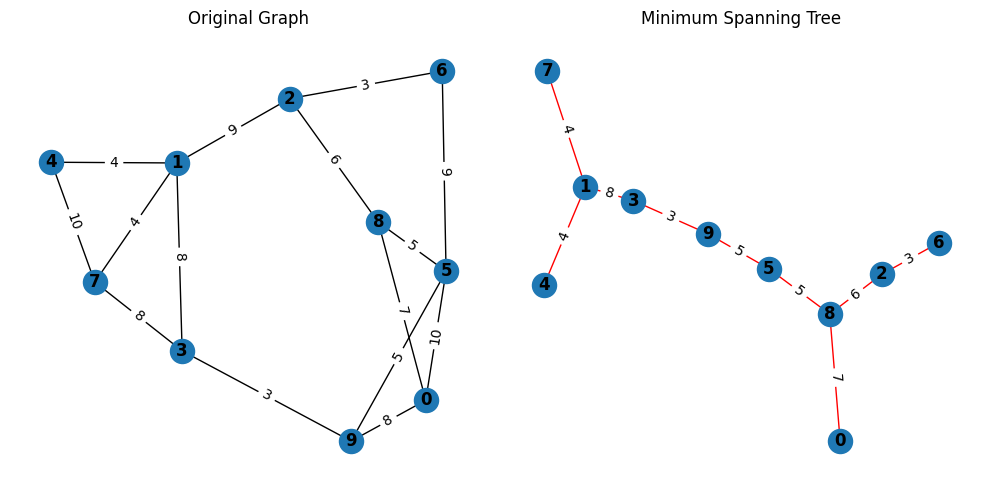

In [12]:
# Implementaion on sparse graph as graph
num_nodes = 10  # Number of nodes
num_edges = 15  # Number of edges
weight_range = (1, 10)  # Range of weights for edges

# Generate weighted sparse graph
weighted_sparse_graph = generate_weighted_sparse_graph(num_nodes, num_edges, weight_range)

# Print nodes, edges, and edge weights
print("Nodes:", weighted_sparse_graph.nodes())
print("Edges:", weighted_sparse_graph.edges())
print("Edge weights:")
for edge in weighted_sparse_graph.edges(data=True):
    print(edge)
mst_graph_sparse = prim_mst(weighted_sparse_graph)
print("\nMinimum Spanning Tree Edges:")
for u, v, w in mst_graph_sparse.edges(data='weight'):
    print(f"Edge: {u} - {v}, Weight: {w}")

# Visualize the original graph and MST (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(121)
pos = nx.spring_layout(weighted_sparse_graph)
nx.draw(weighted_sparse_graph, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(weighted_sparse_graph, 'weight')
nx.draw_networkx_edge_labels(weighted_sparse_graph, pos, edge_labels=labels)
plt.title("Original Graph")

plt.subplot(122)
pos_mst1 = nx.spring_layout(mst_graph_sparse)
nx.draw(mst_graph_sparse, pos_mst1, with_labels=True, font_weight='bold', edge_color='r')
labels_mst = nx.get_edge_attributes(mst_graph_sparse, 'weight')
nx.draw_networkx_edge_labels(mst_graph_sparse, pos_mst1, edge_labels=labels_mst)
plt.title("Minimum Spanning Tree")

plt.tight_layout()
plt.show()

In [13]:
# Time - complexity on dense graph as graph
avg_case = []
best_case = []
worst_case = []
index = []
vertice = 20
for i in range (5, vertice):
    num = 10
    time_vertice = []
    for j in range(1, num):
      start = timeit.default_timer()
      num_nodes = i
      num_edges = num_nodes + 5
      weight_range = (1, 10)
      dense_graph_vertice = generate_dense_graph(num_nodes)
      mst_case = prim(dense_graph_vertice)
      stop = timeit.default_timer()
      expe_time = stop - start
      time_vertice.append(expe_time)
    avg_case.append(sum(time_vertice)/len(time_vertice))
    best_case.append(min(time_vertice))
    worst_case.append(max(time_vertice))
    index.append(i)
print(avg_case)
print(best_case)
print(worst_case)

[3.8426666666029836e-05, 4.886922221519146e-05, 6.750900000282754e-05, 8.126377778062811e-05, 0.00010789600000925425, 0.00013097011111224473, 0.0001453685555550995, 0.0001263767777793924, 0.00012472900000185896, 0.00014190466666264, 0.00016233222222202434, 0.00018836377777612748, 0.00022710499999965982, 0.00023567211110907415, 0.0002527302222227314]
[3.0429999981151923e-05, 4.3191999992586716e-05, 5.933699998195152e-05, 7.060799998725997e-05, 8.776600000715007e-05, 0.00010750199999165488, 0.0001290699999856315, 0.00010310000001823028, 0.00011975000001029912, 0.00013689100001101906, 0.0001573400000154379, 0.00017655199999921933, 0.0002040399999998499, 0.00022254600000337632, 0.0002459250000015345]
[6.232500001601693e-05, 6.335599999829356e-05, 7.62420000057773e-05, 9.611700002665202e-05, 0.000194690000000719, 0.00018456700001934223, 0.00020112800001470532, 0.00018898100000797058, 0.00014653399998110217, 0.00016726300000868832, 0.00018370199998685166, 0.00023842400000262387, 0.0002973340

In [14]:
df = pd.DataFrame({'index': index,'avg_case': avg_case, 'best_case': best_case, 'worst_case': worst_case})
df.head()

,index,avg_case,best_case,worst_case
0,5,0.000038,0.000030,0.000062
1,6,0.000049,0.000043,0.000063
2,7,0.000068,0.000059,0.000076
3,8,0.000081,0.000071,0.000096
4,9,0.000108,0.000088,0.000195


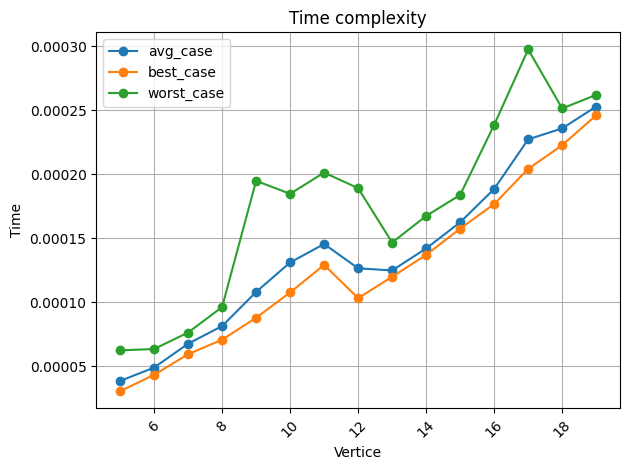

In [15]:
plt.plot(df['index'], df['avg_case'], marker='o', linestyle='-', label='avg_case')
plt.plot(df['index'], df['best_case'], marker='o', linestyle='-', label='best_case')
plt.plot(df['index'], df['worst_case'], marker='o', linestyle='-', label='worst_case')

plt.title('Time complexity')
plt.xlabel('Vertice')
plt.ylabel('Time')
plt.legend()  # Add legend
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [20]:
import timeit
import networkx as nx
import numpy as np
import random

def generate_graph_with_density(num_node, density, weight_range=(1, 10)):
    actual_edges = 0
    G = nx.Graph()
    G.add_nodes_from(range(num_node))
    max_edges = (num_node * (num_node - 1)) / 2
    if density == 0:
        actual_edges = num_node - 1
    elif density > 1:
        print('Error')
    else:
        actual_edges = int(density * max_edges)
    edge_count = 0
    while edge_count < actual_edges:
        node1 = np.random.randint(0, num_node - 1)
        node2 = np.random.randint(0, num_node - 1)
        weight = random.randint(weight_range[0], weight_range[1])
        if node1 != node2 and not G.has_edge(node1, node2):
            G.add_edge(node1, node2, weight=weight)
            edge_count += 1
    return G

def prim_mst(graph):
    mst = nx.Graph()
    start_vertex = list(graph.nodes())[0]
    visited = {start_vertex}
    unvisited = set(graph.nodes()) - visited
    while unvisited:
        min_edge = None
        min_weight = float('inf')
        for u in visited:
            for v in unvisited:
                if graph.has_edge(u, v):
                    weight = graph[u][v]['weight']
                    if weight < min_weight:
                        min_weight = weight
                        min_edge = (u, v)
        if min_edge:
            u, v = min_edge
            mst.add_edge(u, v, weight=min_weight)
            visited.add(v)
            unvisited.remove(v)
    return mst

vertice = 10  # Assuming you have defined 'vertice' somewhere

avg_time_best_case = []
index = []
density = 0
for i in range(5, vertice):
    num = 50
    time_vertice = []
    for j in range(num):  # Adjusted range to iterate 'num' times
        start = timeit.default_timer()
        num_nodes = i
        graph_best_case = generate_graph_with_density(num_nodes, density, weight_range=(1, 10))
        mst = prim_mst(graph_best_case)
        stop = timeit.default_timer()
        expe_time = stop - start
        time_vertice.append(expe_time)
    avg_time_best_case.append(sum(time_vertice) / len(time_vertice))
    index.append(i)

print(avg_time_best_case)  # This will print the list of average times


KeyboardInterrupt: 